# Homework 4: Neural Networks - Crozier Kimball

### Walkthrough Sections

### Preparation

In [50]:
import numpy as np, pandas as pd
path = 'https://raw.githubusercontent.com/lab30041954/Data/main/'
df = pd.read_csv(path + 'mnist.csv.zip')

In [51]:
df.shape

(70000, 785)

In [52]:
y=df['label'].values 
X = df.drop(columns = 'label').values

In [53]:
np.unique(y,return_counts = True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([6903, 7877, 6990, 7141, 6824, 6313, 6876, 7293, 6825, 6958]))

In [54]:
np.unique(X)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

### Q1. Plotting the first image

In [55]:
pic = X[0,:].reshape(28,28)

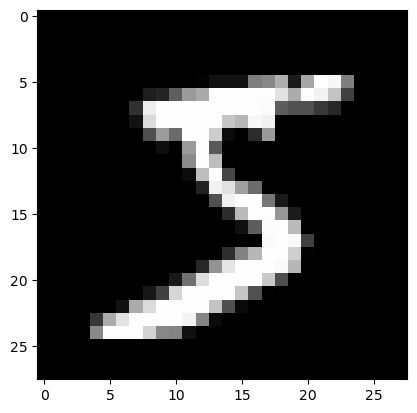

In [56]:
from matplotlib import pyplot as plt 
plt.imshow(pic);

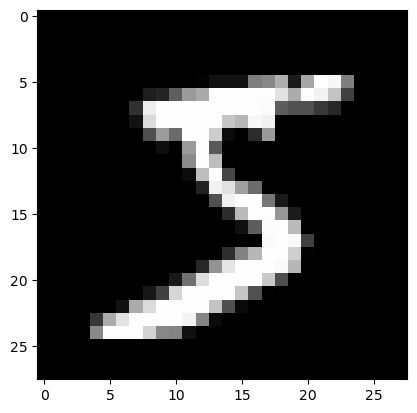

In [57]:
plt.imshow(pic, cmap='gray');

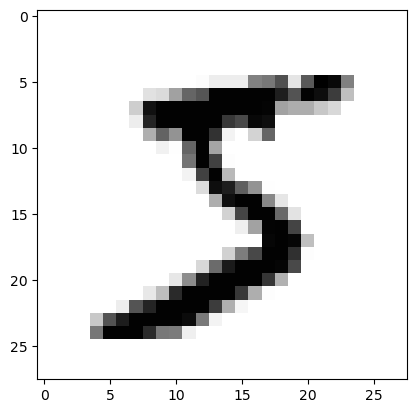

In [58]:
plt.gray()
plt.imshow(255-pic);

### Q2. Plotting other images

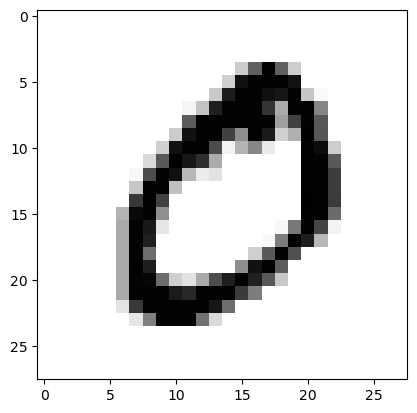

In [59]:
pic = X[1,:].reshape(28,28)
plt.imshow(255-pic);

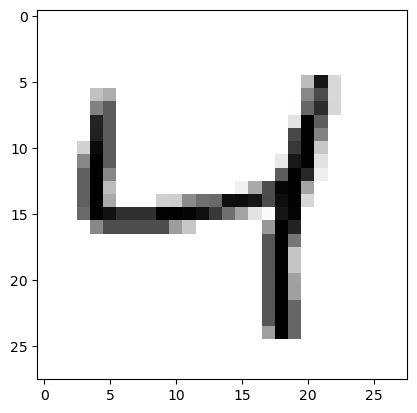

In [60]:
pic = X[2,:].reshape(28,28)
plt.imshow(255-pic);

### Q3. Train-test split

In [61]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 1/7, random_state = 0)

### Q4. Tree-based models

In [62]:
from sklearn.tree import DecisionTreeClassifier 
treeclf = DecisionTreeClassifier(max_leaf_nodes = 128) 
treeclf.fit(X_train, y_train) 
round(treeclf.score(X_train, y_train),3), round(treeclf.score(X_test, y_test),3)    

(0.809, 0.791)

### Q5. MLP model

In [63]:
from sklearn.ensemble import RandomForestClassifier 
rfclf = RandomForestClassifier(max_leaf_nodes = 128, n_estimators = 100) 
rfclf.fit(X_train, y_train) 
round(rfclf.score(X_train, y_train),3), round(rfclf.score(X_test, y_test),3)

(0.926, 0.917)

In [64]:
from keras import Input, models, layers

In [65]:
input_tensor = Input(shape=(784,))

In [66]:
x = layers.Dense(32, activation = 'relu')(input_tensor)

In [67]:
output_tensor = layers.Dense(10, activation = 'softmax')(x)

In [68]:
mlpclf1 = models.Model(input_tensor, output_tensor)

In [69]:
mlpclf1.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │        25,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,450 (99.41 KB)

 Trainable params: 25,450 (99.41 KB)

 Non-trainable params: 0 (0.00 B)

In [70]:
mlpclf1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

In [71]:
mlpclf1.fit(X_train, y_train, epochs = 20, validation_data = (X_test, y_test)); 

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - acc: 0.5869 - loss: 2.1438 - val_acc: 0.7099 - val_loss: 1.0447
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - acc: 0.7662 - loss: 0.7750 - val_acc: 0.8046 - val_loss: 0.6660
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - acc: 0.8520 - loss: 0.5432 - val_acc: 0.8799 - val_loss: 0.4930
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - acc: 0.8948 - loss: 0.3936 - val_acc: 0.9024 - val_loss: 0.4057
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - acc: 0.9086 - loss: 0.3467 - val_acc: 0.8985 - val_loss: 0.3921
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - acc: 0.9154 - loss: 0.3181 - val_acc: 0.9165 - val_loss: 0.3458
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - acc: 0.9226 - loss: 0.2955 - val_acc: 0.9024 - val_loss: 0.3578
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - acc: 0.9247 - loss: 0.2841 - val_acc: 0.9200 - val_loss: 0.3300
Epoch 9/20
1875/1875 ━━━━━━━━━━━━━━━━━━━

### Q6. Prediction with a MLP model

In [72]:
mlpclf1.predict(X_test[:1,:])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


array([[9.9633324e-01, 2.4646382e-10, 1.0214504e-03, 2.8910167e-06,
        3.2881093e-05, 2.5793312e-05, 7.9898215e-05, 2.5018461e-03,
        1.2230787e-06, 6.9427824e-07]], dtype=float32)

In [73]:
y_test[0]

np.int64(0)

### Q7. Rescaling the data

In [74]:
X = X/255 

In [75]:
X_train, X_test = train_test_split(X, test_size = 1/7, random_state= 0)

In [76]:
mlpclf2 = models.Model(input_tensor, output_tensor)
mlpclf2.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['acc']) 
mlpclf2.fit(X_train, y_train, epochs = 20, validation_data = (X_test, y_test));

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - acc: 0.8597 - loss: 0.4896 - val_acc: 0.9273 - val_loss: 0.2511
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - acc: 0.9420 - loss: 0.2030 - val_acc: 0.9431 - val_loss: 0.1956
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - acc: 0.9502 - loss: 0.1679 - val_acc: 0.9465 - val_loss: 0.1764
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - acc: 0.9559 - loss: 0.1498 - val_acc: 0.9506 - val_loss: 0.1640
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - acc: 0.9594 - loss: 0.1377 - val_acc: 0.9532 - val_loss: 0.1572
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - acc: 0.9614 - loss: 0.1291 - val_acc: 0.9526 - val_loss: 0.1561
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - acc: 0.9642 - loss: 0.1213 - val_acc: 0.9546 - val_loss: 0.1503
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - acc: 0.9657 - loss: 0.1164 - val_acc: 0.9531 - val_loss: 0.1526
Epoch 9/20
1875/1875 ━━━━━━━━━━━━━━━━━━━

### Homework questions

1. At every node of every tree, the **random forest** algorithm searches for the best split using a **random subset of features**. The number of features is controlled by the parameter `max_features`. We have used the default, which is the square root of the number of columns of the feature matrix (`max_features=sqrt`). This means, in this case, 28 features. Logic tells us that, by increasing `max_features`, we will improve the accuracy, but the learning process (the fit step) will get slower. Try some variations on this, to see how it works in practice. Do you think that using the default number of features here was a good choice?

2. Develop a **gradient boosting classifier** for these data, extracted from the `xgboost` class `XGBClassifier()`. Take into account that, with hundreds of columns, a gradient boosting model may be much slower to train than a random forest model with the same tree size and number of trees. A model with 100 trees and a size similar to those shown in this example can take one hour to train (less with XGBoost), though you may find a speed-up by increasing the **learning rate**.

3. Develop a **logistic regression classifier** for these data. Compare it with the other models that have appeared in this example.

4. Calculate a **confusion matrix** for the logistic regression model (dimension 10x10). Which is the best classified digit? Which is the main source of misclassification?

5. Try some variations of the MLP model presented in the example of this lecture. For instance, you may increase the number of nodes in the hidden layer to 64, or decrease it to 16. And/or add a second hidden layer. Et cetera. 


# Homework 4: Neural Networks - Crozier Kimball

## Question 3

### Task
3. Develop a **logistic regression classifier** for these data. Compare it with the other models that have appeared in this example.

### Preparation

Start by creating the features matrix `X` and target vector `y`. Use the code chunk that was given in class. 

In [77]:
import numpy as np, pandas as pd 
path = path = 'https://raw.githubusercontent.com/lab30041954/Data/main/'
df = pd.read_csv(path + 'mnist.csv.zip')
y = df['label'].values
X = df.drop(columns='label').values

We split the data set, so we can validate the models that we will train. We keep 10,000 pictures for testing. We set `random_state=0` for reproducibility. So, we will be able to rescale the features and apply the same split to the rescaled data.

In [78]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/7, random_state=0)

As in the walkthrough, we rescale the test and train data dividing by 255. 

In [79]:
X_train, X_test = X_train/255, X_test/255

### Logistic Regression Classifier

We train the logistic regression classifier. As in the walkthrough models, this model will be attempting to classify the digits. So, it will be a multi-class logistic regression model. We set `max_iter=1000` to ensure convergence. 

In [80]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_log_reg = log_reg.predict(X_test)

We evaluate the model on both the training and test sets:

In [81]:
round(log_reg.score(X_train, y_train), 3), round(log_reg.score(X_test, y_test), 3)

(0.94, 0.919)

#### Model Comparison

Compare the accuracy of the logistic regression model with the other models that we have trained in this example. 

In [82]:
results = {
    'Train accuracy': [0.809, 0.925, 0.825, 0.940, 0.991],
    'Test accuracy': [0.791, 0.914, 0.825, 0.919, 0.967]
}
index = ['Decision tree', 'Random forest', 'MLP (unscaled)', 'Logistic regression', 'MLP (rescaled)']
pd.DataFrame(results, index=index)

,Train accuracy,Test accuracy
Decision tree,0.809,0.791
Random forest,0.925,0.914
MLP (unscaled),0.825,0.825
Logistic regression,0.940,0.919
MLP (rescaled),0.991,0.967


The logistic regression model performs surprisingly well, achieving 91.9% test accuracy, 
outperforming both the decision tree and the random forest, despite being a simpler model. 
Only the rescaled MLP outperforms it, reaching 96.7% test accuracy.

The gap between logistic regression and the MLP is likely explained by the nature of the 
models. Logistic regression is a linear model, and can only learn linear decision boundaries 
between classes. The MLP, being a non-linear model, can capture more complex patterns in the 
pixel data. The large performance improvement from rescaling the MLP data also suggests that 
neural networks are particularly sensitive to feature scale.

## Question 4

### Task
4. Calculate a **confusion matrix** for the logistic regression model (dimension 10x10). Which is the best classified digit? Which is the main source of misclassification?

### Preparation and fitting the data to a confusion matrix

In [83]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_log_reg)
conf_matrix

array([[ 964,    0,    2,    2,    1,   13,    8,    0,    6,    0],
       [   0, 1114,    6,    1,    1,    6,    1,    3,    7,    2],
       [   4,   17,  933,   15,   12,    2,   15,    9,   31,    2],
       [   1,    5,   34,  893,    0,   29,    2,   13,   21,   15],
       [   1,    2,    5,    1,  897,    2,   10,   11,    6,   27],
       [   8,    3,    6,   31,    8,  753,   15,    5,   26,    8],
       [   9,    2,    5,    0,   10,   15,  943,    1,    4,    0],
       [   4,    4,   15,    3,   13,    4,    1,  976,    4,   40],
       [   4,   17,    9,   23,    6,   25,   10,    3,  851,   15],
       [   4,    5,    5,   10,   32,    9,    2,   32,    7,  863]])

To make the confusion matrix easier to see, we'll visualize it with a heatmap using Seaborn. We will visualize by proportion vs raw numbers to make it more intuitive. Correct predictions will be shown in blue, and misclassifications in red.

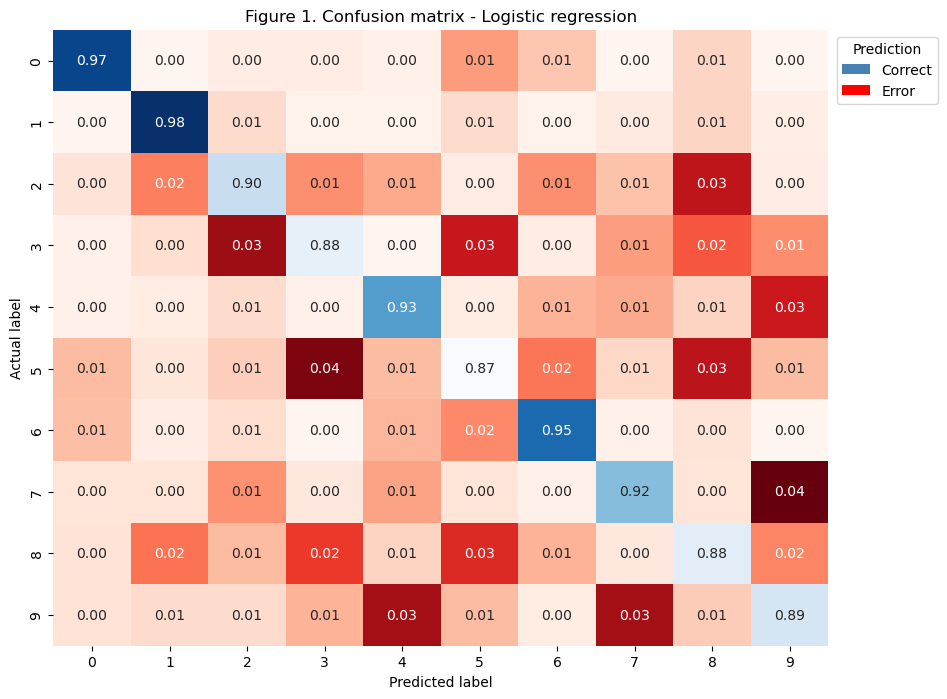

In [84]:
import numpy as np
from matplotlib.patches import Patch

conf_matrix_norm = conf_matrix.astype('float') / conf_matrix.sum(axis=1, keepdims=True)

diagonal = np.where(np.eye(10, dtype=bool), conf_matrix_norm, np.nan)
errors = np.where(~np.eye(10, dtype=bool), conf_matrix_norm, np.nan)

plt.figure(figsize=(10,8))
plt.title('Figure 1. Confusion matrix - Logistic regression')
sns.heatmap(diagonal, annot=True, fmt='.2f', cmap='Blues', mask=np.isnan(diagonal), cbar=False)
sns.heatmap(errors, annot=True, fmt='.2f', cmap='Reds', mask=np.isnan(errors), cbar=False)
plt.xlabel('Predicted label')
plt.ylabel('Actual label')

legend_elements = [Patch(facecolor='steelblue', label='Correct'),
                   Patch(facecolor='red', label='Error')]
plt.legend(handles=legend_elements, title='Prediction', loc='upper right', bbox_to_anchor=(1.15, 1))

plt.show()

From the visualization, we can see that the best classified digit is 1 (0.98), followed closely by 0 (0.97). The worst classified digit is 5 (0.87), with 3 and 8 also performing 
poorly (both 0.88), possibly because they have similar shapes.

The main sources of misclassification are 7 being mistaken for 9 (0.04), and 5 being 
mistaken for 3 (0.04), followed by 4 and 9 being confused for each other (0.03 in both 
directions). These confusions are unsurprising, as these digit pairs tend to look visually 
similar in handwriting.

## Question 5


### Task
5. Try some variations of the MLP model presented in the example of this lecture. For instance, you may increase the number of nodes in the hidden layer to 64, or decrease it to 16. And/or add a second hidden layer. Et cetera. 

### Approach

From the baseline MLP model, we will try a smaller version, a larger version, and a deeper version with two layers. We will keep the same training parameters as the baseline model, and we will evaluate the models on the test set to compare their performance.

#### Baseline Performance (32 nodes, 1 layer)

| Model | Acc | Val_Acc |
|---|---|---|
|Baseline | 0.9913  | 0.9670  |

### Smaller MLP (16 nodes)

For this model, we will change the layers from 32 to 16, keeping the same training parameters as the baseline model. We will evaluate the model on the test set to compare its performance with the baseline model using the acc and val_acc metrics from the last epoch of each model. 

In [89]:
input_tensor = Input(shape=(784,))
x = layers.Dense(16, activation='relu')(input_tensor)
output_tensor = layers.Dense(10, activation='softmax')(x)
mlp_16 = models.Model(input_tensor, output_tensor)
mlp_16.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])
mlp_16.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test));

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - acc: 0.8830 - loss: 0.4219 - val_acc: 0.9188 - val_loss: 0.2753
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - acc: 0.9316 - loss: 0.2362 - val_acc: 0.9323 - val_loss: 0.2353
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - acc: 0.9418 - loss: 0.2026 - val_acc: 0.9369 - val_loss: 0.2160
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - acc: 0.9471 - loss: 0.1827 - val_acc: 0.9403 - val_loss: 0.2035
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - acc: 0.9502 - loss: 0.1695 - val_acc: 0.9434 - val_loss: 0.1902
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - acc: 0.9535 - loss: 0.1576 - val_acc: 0.9453 - val_loss: 0.1849
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - acc: 0.9555 - loss: 0.1492 - val_acc: 0.9431 - val_loss: 0.1879
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - acc: 0.9568 - loss: 0.1438 - val_acc: 0.9461 - val_loss: 0.1846
Epoch 9/20
1875/1875 ━━━━━━━━━━━━━━━━━━━

#### Model Performance 

Having fewer nodes in the hidden layer reduced the training accuracy of the model. However despite the reduction in training accuracy, the validation accuracy only dropped slightly, suggesting that the smaller model may be less prone to overfitting than the baseline model.

### Larger MLP (64 nodes)

Next we will train a larger version of the MLP model, changing the layers from the baseline 32 to 64, and keeping the same training parameters as the baseline model. We will evaluate the model on the test set to compare its performance with the baseline model.

In [ ]:
input_tensor = Input(shape=(784,))
x = layers.Dense(64, activation='relu')(input_tensor)
output_tensor = layers.Dense(10, activation='softmax')(x)
mlp_64 = models.Model(input_tensor, output_tensor)
mlp_64.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])
mlp_64.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test));

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - acc: 0.9171 - loss: 0.2932 - val_acc: 0.9450 - val_loss: 0.1939
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - acc: 0.9582 - loss: 0.1460 - val_acc: 0.9588 - val_loss: 0.1387
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - acc: 0.9691 - loss: 0.1066 - val_acc: 0.9629 - val_loss: 0.1234
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - acc: 0.9749 - loss: 0.0835 - val_acc: 0.9677 - val_loss: 0.1065
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - acc: 0.9795 - loss: 0.0682 - val_acc: 0.9655 - val_loss: 0.1138
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - acc: 0.9823 - loss: 0.0565 - val_acc: 0.9699 - val_loss: 0.0978
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - acc: 0.9847 - loss: 0.0494 - val_acc: 0.9703 - val_loss: 0.1019
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - acc: 0.9874 - loss: 0.0409 - val_acc: 0.9732 - val_loss: 0.0964
Epoch 9/20
1875/1875 ━━━━━━━━━━━━━━━━━━━

#### Model Performance 

The larger model achieved higher training and validation accuracy then the baseline and small models. This suggests that the larger model was able to capture more complex patterns in the data, improving its performance. However, the improvement in validation accuracy was relatively small compared to the increase in training accuracy, which may suggest that the larger model is overfitting to the training data.

### Deeper MLP model (32 nodes, 2 layers)

Finally, we will train a deeper version of the MLP model, with two hidden layers of 32 nodes each. We will keep the same training parameters as the baseline model, and we will evaluate the model on the test set to compare its performance with the baseline model.

In [ ]:
input_tensor = Input(shape=(784,))
x = layers.Dense(32, activation='relu')(input_tensor)
x = layers.Dense(32, activation='relu')(x)
output_tensor = layers.Dense(10, activation='softmax')(x)
mlp_32_32 = models.Model(input_tensor, output_tensor)
mlp_32_32.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])
mlp_32_32.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test));

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - acc: 0.8986 - loss: 0.3507 - val_acc: 0.9433 - val_loss: 0.1903
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - acc: 0.9535 - loss: 0.1548 - val_acc: 0.9537 - val_loss: 0.1498
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - acc: 0.9638 - loss: 0.1197 - val_acc: 0.9609 - val_loss: 0.1308
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - acc: 0.9699 - loss: 0.1000 - val_acc: 0.9622 - val_loss: 0.1248
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - acc: 0.9740 - loss: 0.0870 - val_acc: 0.9632 - val_loss: 0.1247
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - acc: 0.9760 - loss: 0.0778 - val_acc: 0.9621 - val_loss: 0.1305
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - acc: 0.9779 - loss: 0.0696 - val_acc: 0.9680 - val_loss: 0.1110
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - acc: 0.9810 - loss: 0.0617 - val_acc: 0.9594 - val_loss: 0.1323
Epoch 9/20
1875/1875 ━━━━━━━━━━━━━━━━━━━

#### Model Performance 

Adding a second hidden layer did not seem to improve the performance of the model compared to baseline. In fact, the deeper model had slightly lower training and validation accuracy than the baseline model. This suggests that adding a second layer did not help the model capture more complex patterns in the data, and may have even made it more difficult to train effectively.

## Final Comparison of all models

#### Preparation - adding dataframe summary of results

In [91]:
results_q5 = {
    'Train accuracy': [0.991, 0.967, 0.997, 0.991],
    'Test accuracy': [0.967, 0.950, 0.972, 0.966]
}
index_q5 = ['Baseline (32 nodes)', 'Smaller (16 nodes)', 'Larger (64 nodes)', 'Two layers (32→32)']
df_q5 = pd.DataFrame(results_q5, index=index_q5)
df_q5['Gap (train - test)'] = (df_q5['Train accuracy'] - df_q5['Test accuracy']).round(3)
df_q5

,Train accuracy,Test accuracy,Gap (train - test)
Baseline (32 nodes),0.991,0.967,0.024
Smaller (16 nodes),0.967,0.950,0.017
Larger (64 nodes),0.997,0.972,0.025
Two layers (32→32),0.991,0.966,0.025


#### Conclusions

The large MLP model achieved the highest training accuracy (99.7%) and the highest test 
accuracy (97.2%), suggesting that increasing the number of nodes helps the model capture 
more complex patterns in the data. However, it also shows the largest overfitting gap 
(0.025), meaning it is memorizing the training data more than the other models.

The small MLP model had the lowest training and test accuracy, confirming that reducing 
the number of nodes limits the model's capacity to learn. That said, it has the smallest 
overfitting gap, suggesting it generalizes more consistently even if at a lower overall 
performance level.

The deeper model (two layers of 32 nodes) performed almost identically to the baseline, 
suggesting that simply adding depth without increasing the total number of nodes does not 
meaningfully improve performance on this data.

Overall, the results suggest that for this task, widening the network (more nodes) is more 
beneficial than deepening it (more layers), but comes with a trade-off of increased 
overfitting. The baseline model represents a reasonable balance between performance and 
generalization.